# A remark on *Grid cells on steeply sloping terrain*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


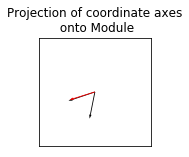

In [226]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 1
S = np.ones(m)*0.5
k = 3
B, V, S = create_kd_hyper_module(m, k, scale=S)
# V = np.zeros((m,k))


plt.figure(figsize=(2,2))
plt.title("Projection of coordinate axes\n onto Module")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])


r1 = B[0,0,:] / S[0]
r2 = B[0,1,:] / S[0]

plt.quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
for l in range(2,k):
    plt.quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

# plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()






(10000, 2)


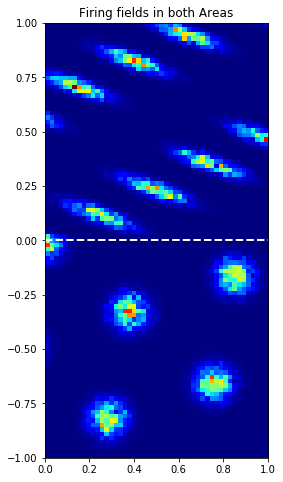

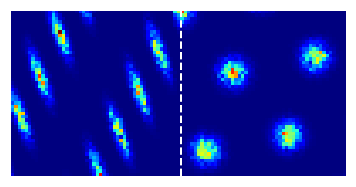

In [227]:
theta = 40/180.*np.pi
Rot   = np.array([
    [1.,0.,0.],
    [0., np.cos(theta), -np.sin(theta)],
    [0., np.sin(theta), np.cos(theta)]
])

T = 30000

box = np.indices((100,100)).reshape((2,-1)).T
box = box/100.
print box.shape

X_flat = np.zeros((T, 3))
X_flat[:,:2] = np.random.sample((T,2)) - np.array([0.0,1.])
# X_flat[:,:2] = box - np.array([0.0,1.])

X_ramp = np.zeros((T, 3))
X_ramp[:,:2] = np.random.sample((T,2))
# X_ramp[:,:2] = box

X_ = np.concatenate([X_flat, X_ramp], axis=0)

X_ramp = np.dot(X_ramp, Rot.T)

X = np.concatenate([X_flat, X_ramp], axis=0)

Q = map_to_hypertorus(B, V, X )
P = map_to_hypertorus(B, V, np.zeros((2*T,3)))

# D = M_dist_comp(Q,P, S=S)[:,0]
D = M_dist_comp_unskewed(Q[:,0],P[:,0], B[0,:2,:2], S=S)

weights = np.exp(- D**2/0.005)

plt.figure(figsize=(4,8))
plt.title("Firing fields in both Areas")
heat,_,_,_ = plt.hist2d(X_[:,0], X_[:,1],weights=weights, bins=[np.linspace(0.,1., num=50),np.linspace(-1.,1., num=100)], cmap="jet");
plt.axhline(0., lw=2., linestyle='--', color="white")
plt.show()


plt.figure(figsize=(6,12), frameon=False)
plt.axis('off')
plt.imshow(heat[:,::-1], cmap="jet");
# plt.imshow(heat[:,::-1], cmap="binary");
plt.xticks([])
plt.yticks([])
plt.axvline(50., lw=2., linestyle='--', color="white")






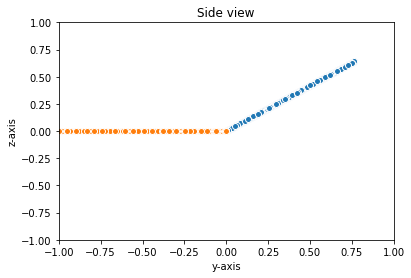

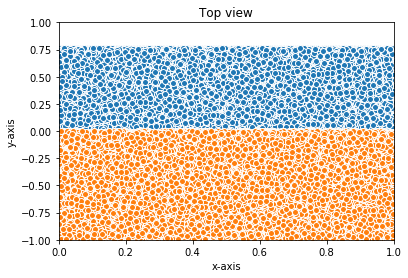

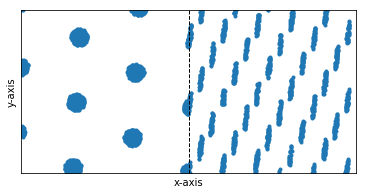

In [219]:
# print Q.shape

plt.title("Side view")
plt.scatter(X_ramp[:,1], X_ramp[:,2], edgecolor="white")
plt.scatter(X_flat[:,1], X_flat[:,2], edgecolor="white")
plt.xlabel("y-axis")
plt.ylabel("z-axis")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

plt.title("Top view")
plt.scatter(X_ramp[:,0], X_ramp[:,1], edgecolor="white")
plt.scatter(X_flat[:,0], X_flat[:,1], edgecolor="white")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.xlim(0,1)
plt.ylim(-1,1)
plt.show()



spikes = np.where(D < 0.05)[0]



plt.figure(figsize=(6,3))
# plt.title("Firing fields")
plt.scatter(X_[spikes,1], X_[spikes,0], marker=".", cmap="binary")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.xlim(-1,1)
plt.ylim(0,1)
plt.axvline(0., lw=1., linestyle='--', color="black")
plt.xticks([])
plt.yticks([])
plt.show()




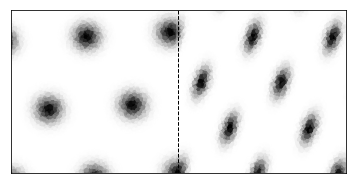

In [152]:
spikes = np.where(D < 0.2)[0]

weights = np.exp(- D**2/.005)

plt.figure(figsize=(6,3))
# plt.title("Firing fields")
plt.scatter(X_[spikes,1], X_[spikes,0], marker=".", c=weights[spikes] , cmap="binary")
plt.xticks([])
plt.yticks([])
plt.xlim(-1,1)
plt.ylim(0,1)
plt.axvline(0., lw=1., linestyle='--', color="black")

plt.show()




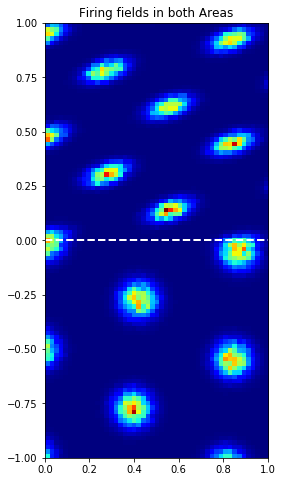

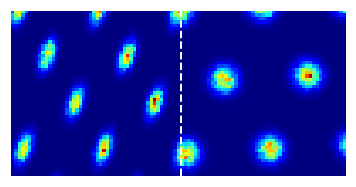

In [153]:
weights = np.exp(- D**2/0.005)

plt.figure(figsize=(4,8))
plt.title("Firing fields in both Areas")
heat,_,_,_ = plt.hist2d(X_[:,0], X_[:,1],weights=weights, bins=[np.linspace(0.,1., num=50),np.linspace(-1.,1., num=100)], cmap="jet");
plt.axhline(0., lw=2., linestyle='--', color="white")
plt.show()


plt.figure(figsize=(6,12), frameon=False)
plt.axis('off')
plt.imshow(heat[:,::-1], cmap="jet");
# plt.imshow(heat[:,::-1], cmap="binary");
plt.xticks([])
plt.yticks([])
plt.axvline(50., lw=2., linestyle='--', color="white")




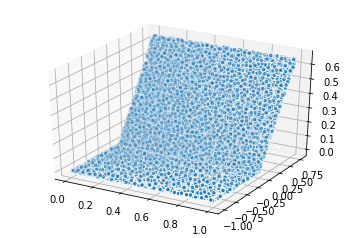

In [77]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], edgecolor="white", marker='o')
plt.show()